## Problem Set 02
### AST 8110, Fall 2022
##### Tyler Barna

In [1]:
import time
bigstart = time.time()

## Importing packages (some of these may not be useful)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
#import numba

import sys
import os
import astropy
import astropy.units as u
import astropy.constants as const
import astropy.coordinates as coord
import random

from tqdm import tqdm
from scipy.stats import binned_statistic as binstat
from scipy import integrate

## Set Seed
random.seed(8110)


### Problem 1

The given Equations for the angular diameter distances are

$$
\begin{equation}
D_A(z) = \frac{c}{H_0} \frac{1}{(1+z)}\int_0^z \frac{dz}{\sqrt{\Omega_{m}(1+z)^3 + \Omega_{\Lambda}}}
\end{equation}
$$

for the distance between the observer and the source ($D_{os}$) (here, $z_o=0$ and $z_s=z$), and

$$
\begin{equation}
D_A(z_l,z_s) = \frac{c}{H_0} \frac{1}{(1+z_s)}\int_{z_l}^{z_s} \frac{dz}{\sqrt{\Omega_{m}(1+z)^3 + \Omega_{\Lambda}}}
\end{equation}
$$

for the disance between the lens and the source ($D_{ls}$). The angular diameter distance between the observer and the lens ($D_{ol}$) can be found by substituting the the lens redshift for the observer redshift and the source redshift for the lens redshift in the latter equation, resulting in the expression

$$
\begin{equation}
D_A(z_o,z_l) = \frac{c}{H_0} \frac{1}{(1+z_l)}\int_{z_o}^{z_l} \frac{dz}{\sqrt{\Omega_{m}(1+z)^3 + \Omega_{\Lambda}}}
\end{equation}
$$

From lecture, the critical surface mass density is given by

$$
\begin{equation}
\Sigma_{crit} = \frac{c^2}{4\pi G} \frac{D_{os}}{ D_{ol} D_{sl}}
\end{equation}
$$

where $D_{os}$ is the angular diameter distance from the observer to the source, $D_{ol}$ is the angular diameter distance from the observer to the lens, and $D_{sl}$ is the angular diameter distance from the source to the lens. 


#### (a)

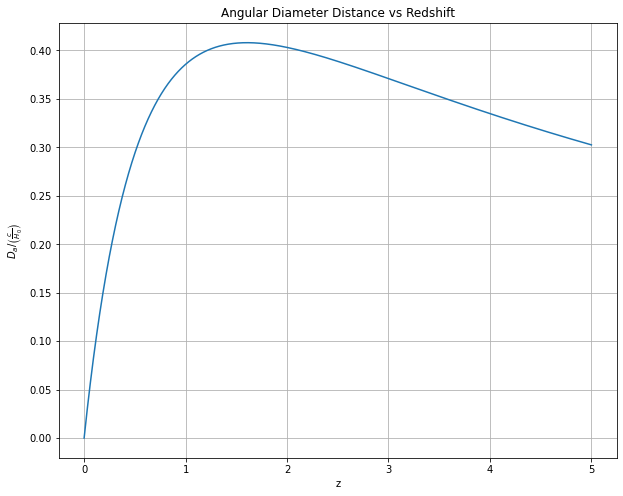

In [2]:
## define lambda function for angular distance with omega_m = 0.3 and omega_l = 0.7 in units of c/H_0
omega_m = 0.3
omega_l = 0.7
d_os = lambda z: 1/(1+z) * integrate.quad(lambda x: 1/np.sqrt(omega_m*(1+x)**3 + omega_l), 0, z)[0]
d_os = np.vectorize(d_os) ## allows input of array

z_s = 5
num_points = 10000
a_range = np.linspace(0, z_s, num_points)

## plot curve
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(a_range, d_os(a_range));
plt.xlabel('z');
plt.ylabel(r'$D_a  / \left(\frac{c}{H_0}\right)$');
plt.title('Angular Diameter Distance vs Redshift');
plt.grid();
plt.show();

#### (b)

From Problem:

$$
\begin{equation}
c^2/(4\pi G)/(c/H_0) = 0.115 g/c^2
\end{equation}
$$

We will plot the y axis in units of this value

In [3]:
## define angular diameter distance in units of c/H_0 for two redshifts (the c/H0 will be handled in sigma_crit)
integrand = lambda z: 1/np.sqrt(omega_m * (1+z)**3 + omega_l)
d_a = lambda z1, z2: 1/(1+z2) * integrate.quad(integrand, z1, z2)[0]
d_a = np.vectorize(d_a) ## allows input of array

In [4]:
## define unit constant (using astropy units)
unit_const = 0.115 * u.g *(u.cm)**2

## define sigma_crit (sigma = const * d_os / (d_ol * d_ls))
sigma_crit = lambda z_o, z_l, z_s: unit_const * (d_a(z_o, z_s) / (d_a(z_o, z_l) * d_a(z_l, z_s)))

In [5]:
## define redshift values
z_o = 0 ## observer redshift
z_l = 0.4 ## lens redshift (fixed)
z_s = np.linspace(0.41,7,num_points) ## source redshift

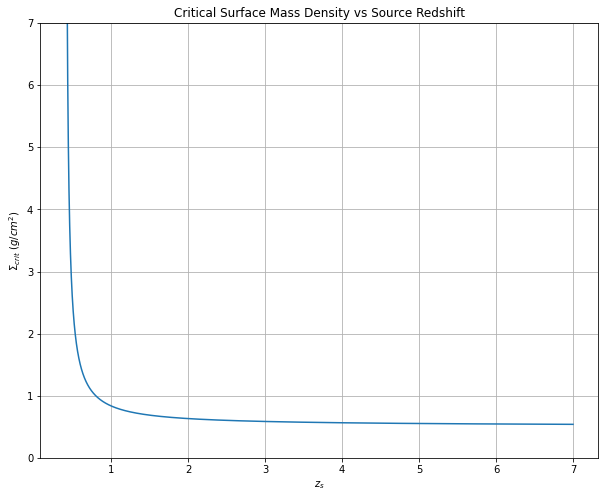

In [6]:
## plot curve
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(z_s, sigma_crit(z_o, z_l, z_s));
plt.xlabel(r'$z_s$');
plt.ylabel(r'$\Sigma_{crit} \ (g/cm^2)$');
plt.title('Critical Surface Mass Density vs Source Redshift');
plt.ylim(0, 7); ## since it will appraoch infinity as it approaches z_s = z_l
plt.grid();
plt.show();

#### (c)

In [7]:
## define redshift values
z_o = 0 ## observer redshift
z_l = np.linspace(0.01,1.8,num_points) ## lens redshift (limited so we get a useful plot)
z_s = 2 ## source redshift (fixed)

Minimum value of sigma_crit occurs at z_l = 0.5185898589858986
Minimum value of $\Sigma_{crit}$:  0.615229769522618 cm2 g


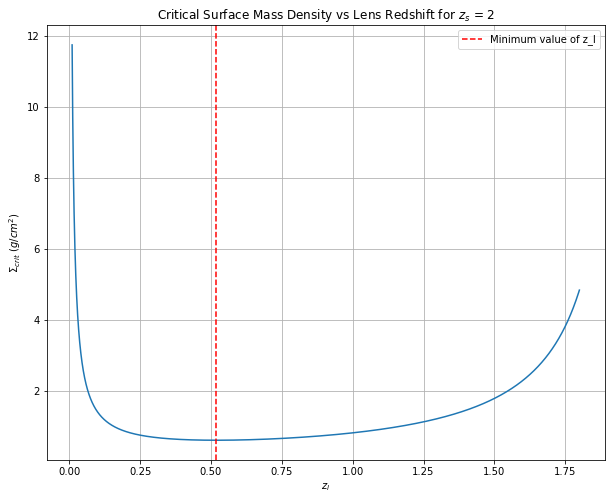

In [8]:
## calculate value of z_l where sigma_crit is minimum
z_l_min = z_l[np.argmin(sigma_crit(z_o, z_l, z_s))]
print('Minimum value of sigma_crit occurs at z_l =', z_l_min)
print(r'Minimum value of $\Sigma_{crit}$: ', sigma_crit(z_o, z_l_min, z_s))

## plot curve
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(z_l, sigma_crit(z_o, z_l, z_s));
plt.xlabel(r'$z_l$');
plt.ylabel(r'$\Sigma_{crit} \ (g/cm^2)$');
plt.title(r'Critical Surface Mass Density vs Lens Redshift for $z_s$ = 2');
plt.grid();


## plot minimum value of z_l
plt.axvline(z_l_min, color='r', linestyle='--',label='Minimum value of z_l');
plt.legend();
plt.show();

#### (d)

In [9]:
## define redshift values
z_o = 0 ## observer redshift
z_l = np.linspace(0.01,999,num_points) ## lens redshift 
z_s = 1000 ## source redshift (fixed)

Minimum value of sigma_crit occurs at z_l = 1.0090899089908991
Minimum value of sigma_crit:  0.39326470857730966 cm2 g


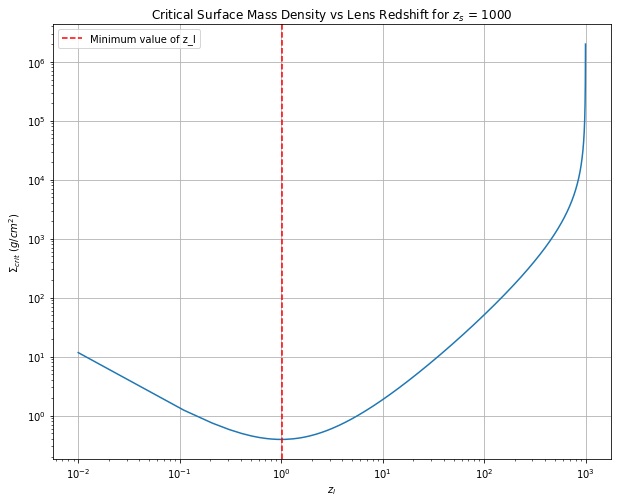

In [12]:
## calculate value of z_l where sigma_crit is minimum
z_l_min = z_l[np.argmin(sigma_crit(z_o, z_l, z_s))]
print('Minimum value of sigma_crit occurs at z_l =', z_l_min)
print(r'Minimum value of sigma_crit: ', sigma_crit(z_o, z_l_min, z_s))

## plot curve
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(z_l, sigma_crit(z_o, z_l, z_s));
plt.xlabel(r'$z_l$');
plt.ylabel(r'$\Sigma_{crit} \ (g/cm^2)$');
plt.title(r'Critical Surface Mass Density vs Lens Redshift for $z_s$ = 1000');
plt.grid();
## using a log log plot so we can actually see the minimum
plt.xscale('log');
plt.yscale('log');

## plot minimum value of z_l
plt.axvline(z_l_min, color='r', linestyle='--',label='Minimum value of z_l');
plt.legend();
plt.show();